Your tasks are as follows:

1.	**Build a regression model using Python’s statsmodels module that demonstrates a relationship between the number of bikes in a particular location and the characteristics of the POIs in that location.**
2.	Interpret results. Expand on the model output, and derive insights from your model.
3.	Stretch: can you think of a way to turn the above regression problem into a **classification** one? Without coding, can you sketch out how you would cast the problem specifically, and lay out your approaches?

Complete the model_building.ipynb notebook to demonstrate how you executed the tasks above.


In [1]:
import statsmodels.api        as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Build a regression model
**Target variable: Number_Of_Bikes**

Actually, Number_Of_Bikes is not really a continuous data, but we can see it as numerical data or categorical data (13 classes)

Below, I will try to treat it as continuous data to build a regression model.

In [2]:
# Load data
df = pd.read_csv('../data/bikeproject_Part3.csv')
df.head()

,Name_Station,Latitude_Station,Longitude_Station,Number_Of_Bikes,Venue_Name,Venue_Address,Venue_Distance,Venue_Phone,Venue_Rating,Venue_Price,Venue_Review_Count,Venue_URL,Venue_Subcategory,Venue_Category
0,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16,Village Crown Kosher Catering,1,401.379171,1,4.9,2,9,1.0,Caterers,restaurant
1,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16,Charoen Krung,1,227.252387,1,4.8,2,121,1.0,Thai,restaurant
2,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16,Quick Stop,1,672.822715,1,4.8,1,9,1.0,Coffee & Tea,restaurant
3,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16,Kati Shop,1,495.560320,1,4.7,2,212,1.0,Thai,restaurant
4,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16,Tony's Coffee Cart,1,732.206967,0,4.7,1,7,0.0,Coffee & Tea,restaurant


In [3]:
df.shape

(5152, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name_Station        5152 non-null   object 
 1   Latitude_Station    5152 non-null   float64
 2   Longitude_Station   5152 non-null   float64
 3   Number_Of_Bikes     5152 non-null   int64  
 4   Venue_Name          5152 non-null   object 
 5   Venue_Address       5152 non-null   int64  
 6   Venue_Distance      5152 non-null   float64
 7   Venue_Phone         5152 non-null   int64  
 8   Venue_Rating        5152 non-null   float64
 9   Venue_Price         5152 non-null   int64  
 10  Venue_Review_Count  5152 non-null   int64  
 11  Venue_URL           5152 non-null   float64
 12  Venue_Subcategory   5152 non-null   object 
 13  Venue_Category      5152 non-null   object 
dtypes: float64(5), int64(5), object(4)
memory usage: 563.6+ KB


* Even though `Venue_Address`,`Venue_Phone`, `Venue_Price`, `Venue_URL` columns have values 0/1... (integer), they visually present numeric, but theirs essence is categorical data type.

* For the purpose of statistical modelling, I'm going to drop columns that are not significantly meaning for modelling.

In [5]:
# drop unneccessay columns for modelling 
df = df.drop(['Name_Station','Venue_Name'], axis=1)
df.shape

(5152, 12)

In [6]:
df.nunique()

Latitude_Station        37
Longitude_Station       37
Number_Of_Bikes         13
Venue_Address            2
Venue_Distance        4672
Venue_Phone              2
Venue_Rating            37
Venue_Price              5
Venue_Review_Count     539
Venue_URL                2
Venue_Subcategory      215
Venue_Category          13
dtype: int64

In [7]:
df['Venue_Category'].unique()

array(['restaurant', 'coffee', 'bar', 'hotel', 'shopping', 'supermarket',
       'museum', 'hospital', 'stadium', 'cinema', 'bus', 'school', 'park'],
      dtype=object)

Due to regression model requires fearture's data can be converted to NUMERIC DATA.

Therefore, in order to use the regression model, I need to continue address `Venue_Subcategory` and `Venue_Subcategory` columns (because its data is string that cannot be converted to numeric data). Due to Subcategory has too much classes, so I cannot map manually. I am going to use loop as follows:

In [8]:
# Create a dictionary mapping between the category labels and the corresponding integer values
mapping_subcategory = {subcategory:index  for index, subcategory in enumerate(df['Venue_Subcategory'].unique(), start=1)}
mapping_category    = {category:index  for index, category in enumerate(df['Venue_Category'].unique(), start=1)}

# Apply the mapping to the columns
df['Venue_Category'] = df['Venue_Category'].map(mapping_category)
df['Venue_Subcategory'] = df['Venue_Subcategory'].replace(mapping_subcategory)

In [9]:
df.tail()

,Latitude_Station,Longitude_Station,Number_Of_Bikes,Venue_Address,Venue_Distance,Venue_Phone,Venue_Rating,Venue_Price,Venue_Review_Count,Venue_URL,Venue_Subcategory,Venue_Category
5147,40.733486,-73.989565,14,1,648.640472,1,4.2,2,61,1.0,151,12
5148,40.733486,-73.989565,14,1,372.101711,1,4.2,3,60,1.0,44,12
5149,40.733486,-73.989565,14,1,712.220500,1,4.6,2,51,1.0,191,8
5150,40.733486,-73.989565,14,1,530.179160,1,4.1,1,12,0.0,56,8
5151,40.733486,-73.989565,14,1,909.265159,1,3.6,2,232,1.0,110,8


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Latitude_Station    5152 non-null   float64
 1   Longitude_Station   5152 non-null   float64
 2   Number_Of_Bikes     5152 non-null   int64  
 3   Venue_Address       5152 non-null   int64  
 4   Venue_Distance      5152 non-null   float64
 5   Venue_Phone         5152 non-null   int64  
 6   Venue_Rating        5152 non-null   float64
 7   Venue_Price         5152 non-null   int64  
 8   Venue_Review_Count  5152 non-null   int64  
 9   Venue_URL           5152 non-null   float64
 10  Venue_Subcategory   5152 non-null   int64  
 11  Venue_Category      5152 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 483.1 KB


### Define target variable and independent variables

In [11]:
X = df[df.columns[~df.columns.isin(['Number_Of_Bikes'])]]  # inputs
y = df['Number_Of_Bikes']                                  # output

print(X.shape)
X.columns

(5152, 11)


Index(['Latitude_Station', 'Longitude_Station', 'Venue_Address',
       'Venue_Distance', 'Venue_Phone', 'Venue_Rating', 'Venue_Price',
       'Venue_Review_Count', 'Venue_URL', 'Venue_Subcategory',
       'Venue_Category'],
      dtype='object')

### 1) Build a Multivariate Linear Regression with all current 11 independent variables
targer variable is Number_Of_Bikes

In [12]:
X1 = sm.add_constant(X) # adding a constant

model = sm.OLS(y,X1)    # Create model
result = model.fit()

print(result.summary())       # See model result

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Bikes   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.750
Date:                Thu, 11 Apr 2024   Prob (F-statistic):             0.0571
Time:                        16:07:29   Log-Likelihood:                -16042.
No. Observations:                5152   AIC:                         3.211e+04
Df Residuals:                    5140   BIC:                         3.219e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                514.1037    658

In [13]:
# result.pvalues
# result.params   # coef
# result.resid 

## Interpret of the result of model 1): 
1. The **p-value for most of the variables is very high** ---> indicates that we have no evidence to suggest an effect on the response variable (except for `Distance` characteristic of POI)---> In other words, most of input variables (characteristics of POI) do not have a significant effect on the dependent variable 'Number_Of_Bikes'. **In this case, it may be useful to focus on `Venue_Distance`**, which has a p-value < 0.05, and **`Venue_Rating` and `Longitude_Station`**, even though their p-values are not statistically significant, **their impact may still be significant.**
2. The **F-statistic** is **1.750** and **Prob (F-statistic)** the corresponding p-value is **0.0571**  suggesting that this model may not be statistically significant (A p-value below 0.05 is generally considered statistically significant).
3. The **Adj. R-squared is extremely low**: In this output, we can see that the value is **0.002** meaning that this model is capable of explaining 0.2% of the patterns in the data ---> this model explains only a very small portion of the variation in the dependent variable.---> proves that this model, as constructed for my particular data set, is a **extremely poor model**.

**In summary**, based on the model results, it appears that the current model (11 independent variables) is **not strong enough to demonstrate a relationship between the number of bikes in a particular location and the characteristics of the POIs in that location**. In other words, this model is not strong enough to predict the number of bikes at bike stations. **Further research** and analysis **are needed** to identify important factors and improve the model.


===> I am going to revisit the EDA process and try to buil models with different combinations of independent variables.

### 2) Build a Simple Linear Regression with 1 independent variable 'Longitude'

In [14]:
X = df[['Longitude_Station']]  # Define target variable and independent variables
y = df['Number_Of_Bikes']
print(X.shape)

X1 = sm.add_constant(X) # adding a constant
model = sm.OLS(y,X1)    # Create model
result = model.fit()
print(result.summary())       # See model result

(5152, 1)
                            OLS Regression Results                            
Dep. Variable:        Number_Of_Bikes   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.759
Date:                Thu, 11 Apr 2024   Prob (F-statistic):            0.00309
Time:                        16:07:29   Log-Likelihood:                -16047.
No. Observations:                5152   AIC:                         3.210e+04
Df Residuals:                    5150   BIC:                         3.211e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               949.4412

### 3) Build a Multivariate Linear Regression with 2 independent variables 'Longitude' and 'Distance'

In [15]:
X = df[['Longitude_Station','Venue_Distance']]  # Define target variable and independent variables
y = df['Number_Of_Bikes']
print(X.shape)

X1 = sm.add_constant(X) # adding a constant
model = sm.OLS(y,X1)    # Create model
result = model.fit()
print(result.summary())       # See model result

(5152, 2)
                            OLS Regression Results                            
Dep. Variable:        Number_Of_Bikes   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.701
Date:                Thu, 11 Apr 2024   Prob (F-statistic):            0.00124
Time:                        16:07:29   Log-Likelihood:                -16045.
No. Observations:                5152   AIC:                         3.210e+04
Df Residuals:                    5149   BIC:                         3.212e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               925.8624

### 4) Build a Multivariate Linear Regression with 3 independent variables 'Longitude', 'Distance', and 'Rating'

In [16]:
X = df[['Longitude_Station','Venue_Distance','Venue_Rating']]  # Define target variable and independent variables
y = df['Number_Of_Bikes']
print(X.shape)

X1 = sm.add_constant(X) # adding a constant
model = sm.OLS(y,X1)    # Create model
result = model.fit()
print(result.summary())       # See model result

(5152, 3)
                            OLS Regression Results                            
Dep. Variable:        Number_Of_Bikes   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.354
Date:                Thu, 11 Apr 2024   Prob (F-statistic):            0.00111
Time:                        16:07:29   Log-Likelihood:                -16044.
No. Observations:                5152   AIC:                         3.210e+04
Df Residuals:                    5148   BIC:                         3.212e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               940.0385

## Interpret of the results of model 2), 3), 4): 
COMPARED 3 above model results each others and WITH the first one, we can see model number 3 (model with 2 independent variables 'Longitude' and 'Distance') is the best.

* The Adj. R-squared increases but not too much and it is still low (0.003).
* The F-statistic this time increases from 1.750 to **6.925** and the corresponding p-value decreases from 0.0571 to **0.000994**

  ---> indicating that **the model as a whole this time with 2 independent variables is statistically significant** (This means that the model provides valuable information about the relationship between the independent variables and the dependent variable, and that this relationship is unlikely to be due to random chance.)  ----> BETTER compared to the model number 1.
* Moreover, the p-value for 2 these variables < 0.05 ---> these independent varibales have a significant effect on the dependent variable 'Number_Of_Bikes'.

  ---> This implies that the geographical location of POIs and the distance from bike stations may have a strong relationship with the demand for bike usage at each location. For example, bike stations near important points such as restaurants, convenience stores, or entertainment areas may attract more users.  This makes longitude and distance key factors in building a model to predict the number of bikes at bike stations.

**In summary**, based on the results of model 3 (model with 2 independent variables 'Longitude' and 'Distance'), it appears that overall model appears to be statistically significant. Specifically, **Longitude and Distance characteristic of nearby POIs appears to be the most important predictor of the number of bikes at bike stations**. However, the model doesn't well fits the data. This model is capable of explaining 0.3% of the patterns in the data. This model explains only a very small portion of the variation in the dependent variable.

### 5) Try Poly Linear Regression models

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# With 2 independent variables
X = df[['Longitude_Station','Venue_Distance']]
y = df['Number_Of_Bikes']

degree = 2
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)
X_poly = sm.add_constant(X_poly)

model_poly = sm.OLS(y, X_poly)
result_poly = model_poly.fit()

print(result_poly.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Bikes   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     11.31
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           7.11e-11
Time:                        16:07:29   Log-Likelihood:                -16023.
No. Observations:                5152   AIC:                         3.206e+04
Df Residuals:                    5146   BIC:                         3.210e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.01e+06   1.08e+06     -5.574      0.0

In [18]:
# With 1 independent variable
X = df[['Longitude_Station']]
y = df['Number_Of_Bikes']

degree = 2
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)
X_poly = sm.add_constant(X_poly)

model_poly = sm.OLS(y, X_poly)
result_poly = model_poly.fit()

print(result_poly.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Bikes   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     21.38
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           5.66e-10
Time:                        16:07:29   Log-Likelihood:                -16030.
No. Observations:                5152   AIC:                         3.207e+04
Df Residuals:                    5149   BIC:                         3.209e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.249e+06   1.07e+06     -5.825      0.0

### Comment:  The results are not better.

#
### Try to remove more outliers

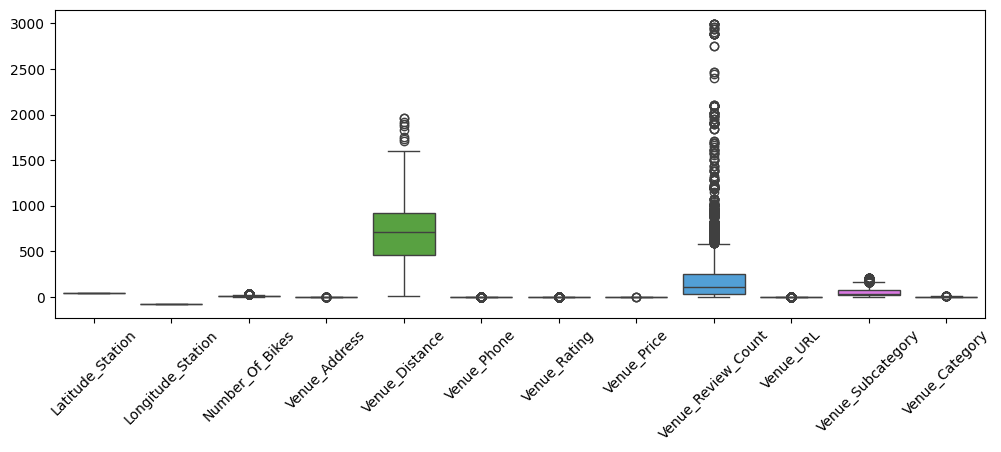

In [19]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [20]:
def remove_outliers(df, column_name, lower_percentile=0.25, upper_percentile=0.75, threshold=1.5):
    Q1 = df[column_name].quantile(lower_percentile)
    Q3 = df[column_name].quantile(upper_percentile)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)] 

In [21]:
# Implement removing outliers  for 'Venue_Distance', 'Venue_Review_Count' columns

print("Shape of dataframe df before removing outliers:", df.shape)

for col in ['Venue_Distance','Venue_Review_Count']:   
    df = remove_outliers(df, col)
df  = df.reset_index(drop=True)  

print("Shape of dataframe df before removing outliers:", df.shape)

Shape of dataframe df before removing outliers: (5152, 12)
Shape of dataframe df before removing outliers: (4654, 12)


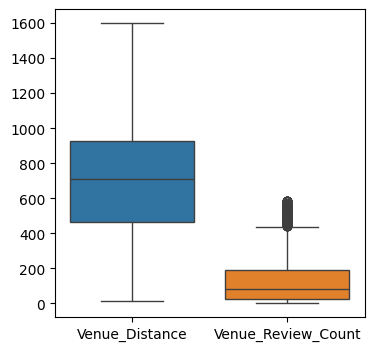

In [22]:
# Draw a graph to see outliers again
plt.figure(figsize=(4,4))
sns.boxplot(data=df[['Venue_Distance', 'Venue_Review_Count']])
plt.show()

### 6) Build a Linear Regression after REMOVING MORE OUTLIERS

In [23]:
# With 1 independent variable
X = df[['Longitude_Station']]  
y = df['Number_Of_Bikes']
print(X.shape)

X1 = sm.add_constant(X) # adding a constant
model = sm.OLS(y,X1)    # Create model
result = model.fit()
print(result.summary())       # See model result

(4654, 1)
                            OLS Regression Results                            
Dep. Variable:        Number_Of_Bikes   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.326
Date:                Thu, 11 Apr 2024   Prob (F-statistic):            0.00393
Time:                        16:07:29   Log-Likelihood:                -14486.
No. Observations:                4654   AIC:                         2.898e+04
Df Residuals:                    4652   BIC:                         2.899e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               961.1658

In [24]:
# With 2 independent variables
X = df[['Longitude_Station','Venue_Distance']]
y = df['Number_Of_Bikes']
print(X.shape)

X1 = sm.add_constant(X) # adding a constant
model = sm.OLS(y,X1)    # Create model
result = model.fit()
print(result.summary())       # See model result

(4654, 2)
                            OLS Regression Results                            
Dep. Variable:        Number_Of_Bikes   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.046
Date:                Thu, 11 Apr 2024   Prob (F-statistic):            0.00239
Time:                        16:07:29   Log-Likelihood:                -14484.
No. Observations:                4654   AIC:                         2.897e+04
Df Residuals:                    4651   BIC:                         2.899e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               943.0739

In [25]:
# With 3 independent variables
X = df[['Longitude_Station','Venue_Distance','Venue_Rating']]
y = df['Number_Of_Bikes']
print(X.shape)

X1 = sm.add_constant(X) # adding a constant
model = sm.OLS(y,X1)    # Create model
result = model.fit()
print(result.summary())       # See model result

(4654, 3)
                            OLS Regression Results                            
Dep. Variable:        Number_Of_Bikes   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.644
Date:                Thu, 11 Apr 2024   Prob (F-statistic):            0.00303
Time:                        16:07:29   Log-Likelihood:                -14483.
No. Observations:                4654   AIC:                         2.897e+04
Df Residuals:                    4650   BIC:                         2.900e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               953.1201

### Comment:  Even after removing more outliers, the results are not better.

### The relationship between variables is not strongly linear as we have assumed in the regression model and the **target varibale 'Number_Of_Bikes' is not a continuous data**, so Regression Model is not appropriate.
We can try with classification model then.

# Stretch

### How can you turn the regression model into a classification model?

In order to turn the regression model into a classification model, we can define classes or categories for the number of bikes (likely divide it into bins). For example, we could define categories like **"low bike capability", "medium bike capability"**, and **"high bike capability"** based on certain thresholds of the number of bikes. Then, **our target variable turns into categorical type, so we can apply a classification model**.

The threshold which defines each class could be based on domain knowledge or statistical analysis of the distribution of the number of bikes.
For example:
- low bike capability   : < 8
- medium bike capability: 8 - 16
- high bike capability  : > 16
- 
OR even we can treat a value as a class  ---> then we have 13 classes.

We will do the steps similar to a regression model, include:
- Bivariate analysis with target variable as a new type, categorical type.
- Feature selection
- Encode categorical variables
- Model selection
- Model applying
- Model evaluation
- Iterating to find the best model.

In [26]:
print("Values of 'Number_Of_Bikes':")
np.sort(df['Number_Of_Bikes'].unique())

Values of 'Number_Of_Bikes':


array([ 2,  8,  9, 10, 11, 12, 13, 14, 15, 16, 20, 21, 32], dtype=int64)

In [27]:
print("Number of values of 'Number_Of_Bikes':")
df['Number_Of_Bikes'].nunique()

Number of values of 'Number_Of_Bikes':


13

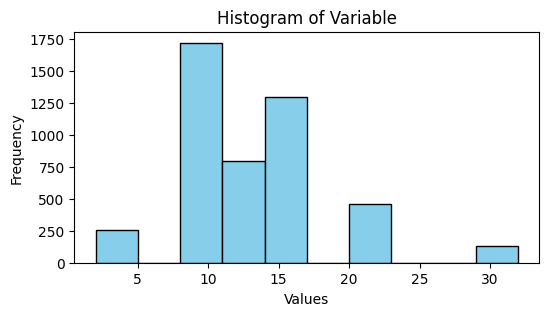

In [28]:
# Draw histogram
plt.figure(figsize=(6,3))
plt.hist(df[['Number_Of_Bikes']], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Variable')
plt.show()